# Speed testing

In [7]:
import sys
sys.path.insert(0, '../../src')

import json
import random
from time import perf_counter
import matplotlib.pyplot as plt
from collections import defaultdict

from farkle.logic import gameobjects as go

Baseline `dh.possible_scores()` time. 

In [6]:
t_list = []
dh = go.DiceHand()
num_sims = 1000

for i in range(num_sims):
    dh.roll()
    t0 = perf_counter()
    dh.possible_scores()
    t1 = perf_counter()
    t_list.append(t1-t0)
    
mean_t = sum(t_list) / num_sims
max_t = max(t_list)
min_t = min(t_list)

print(f'{num_sims} sims: ')
print(f'{round(mean_t, 5)} sec avg')
print(f'{round(min_t, 5)}, {round(max_t, 5)}, min, max')
plt.hist(t_list)
plt.show()

1000 sims: 
0.01301 sec avg
0.00132, 0.19066, min, max


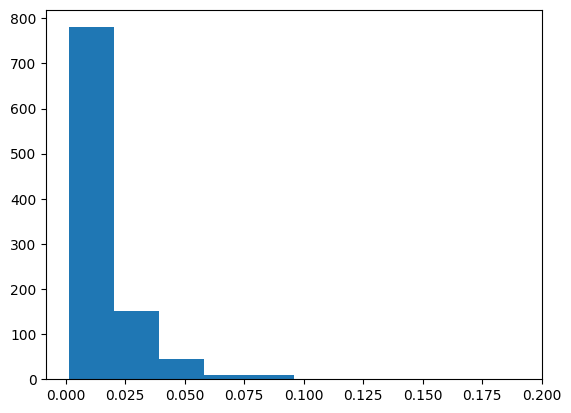

In [11]:
plt.hist(t_list)
plt.show()

In [20]:
dice = [1,3,1,2,5]

In [31]:
scores = ['5', '1', '222', '333', '444', '555', '666', '111']

In [49]:
scores_dict = {1: {'1': 100, '111': 1000},
               2: {'222': 200}, 
               3: {'333': 300}, 
               4: {'444': 400},
               5: {'5': 50, '555': 500}, 
               6: {'666': 600}}

In [41]:
dice.sort()
dice_count = [f'{n}'*dice.count(n) for n in range(1, 7)] # if dice.count(n) != 0}
dice_count

['11', '2', '3', '', '5', '']

In [53]:
for die_num in range(6):
    dc = dice_count[die_num]
    for s in scores_dict[die_num+1]:
        if s in dc:
            print(f'{s} in {dc}')
            for c in range(dc.count(s)):
                print(f'\t{s*(c+1)} -> score: {scores_dict[die_num+1][s]*(c+1)}')

1 in 11
	1 -> score: 100
	11 -> score: 200
5 in 5
	5 -> score: 50


In [54]:
dice = [1,1,1,2,5]

In [55]:
scores = ['5', '1', '222', '333', '444', '555', '666', '111']

In [56]:
scores_dict = {1: {'1': 100, '111': 1000},
               2: {'222': 200}, 
               3: {'333': 300}, 
               4: {'444': 400},
               5: {'5': 50, '555': 500}, 
               6: {'666': 600}}

In [57]:
dice.sort()
dice_count = [f'{n}'*dice.count(n) for n in range(1, 7)] # if dice.count(n) != 0}
dice_count

['111', '2', '', '', '5', '']

In [58]:
for die_num in range(6):
    dc = dice_count[die_num]
    for s in scores_dict[die_num+1]:
        if s in dc:
            print(f'{s} in {dc}')
            for c in range(dc.count(s)):
                print(f'\t{s*(c+1)} -> score: {scores_dict[die_num+1][s]*(c+1)}')

1 in 111
	1 -> score: 100
	11 -> score: 200
	111 -> score: 300
111 in 111
	111 -> score: 1000
5 in 5
	5 -> score: 50
